In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

- Выбрать какое либо распределение, построить выбору объема 1000 и нарисовать поверх плотность распределения
- Сгенерировать 1000 выборок объёма n = [5,10,50] и построить гистограммы распределений их выборочных средних
- Используя информацию о среднем и дисперсии, посчитайте значения параметров нормальных распределений которым приближается исходное
- Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения

### Пункт первый

In [4]:
#Создаём наше распределение, которое будем изучать
sigma = 5

rayleigh = sts.rayleigh(scale = sigma)

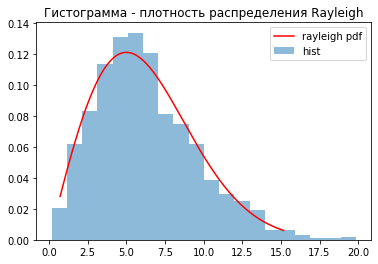

In [5]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(rayleigh.ppf(0.01), rayleigh.ppf(0.99), 1000)
ax.plot(x, rayleigh.pdf(x), 'r-', label='rayleigh pdf')

r = rayleigh.rvs(size = 1000)
ax.hist(r, density = True, bins = 20, alpha = 0.5, label = 'hist')
ax.legend()
ax.set_title('Гистограмма - плотность распределения Rayleigh')
plt.show()

### Пункт второй

In [6]:
n = [5, 10, 50]

In [7]:
#Генерируем выборки выборочных средних при разных объемов n
X_mean = np.zeros((3,1000))

for i in range(len(n)):
    for j in range(1000):
        X_mean[i][j] = np.mean(rayleigh.rvs(size = n[i]))

### Пункт третий

In [162]:
#Вычисляем значение среднего и среднеквадритичного для исходного распределения (по теоретическим данным)
m = sigma*np.sqrt(np.pi/2)
var = (4-np.pi)/2*sigma**2
print(m, var)

#Вычисляем среднеквадратичное для наших норм. распределений
sigma0 = np.sqrt(var/n[0])
sigma1 = np.sqrt(var/n[1])
sigma2 = np.sqrt(var/n[2])
print(sigma0, sigma1, sigma2)

6.2665706865775 10.730091830127586
1.464929474761675 1.0358615655640278 0.46325137517610426


### Пункт четвертый

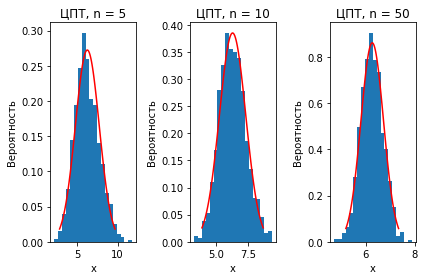

In [166]:
fig, axes = plt.subplots(nrows=1, ncols=3) #Создаем Figure
ax0, ax1, ax2 = axes.flatten()

norm_rv_0 = sts.norm(loc = m, scale = sigma0) #Первый график, n = 5
x = np.linspace(norm_rv_0.ppf(0.01),
                   norm_rv_0.ppf(0.99), 100)
ax0.hist(X_mean[0], density = True, bins = 20, label = 'n = ' + str(n[0]))
ax0.plot(x, norm_rv_0.pdf(x),
            'r-', label='norm pdf')
ax0.set_title('ЦПТ, n = ' + str(n[0]))
ax0.set_xlabel('x')
ax0.set_ylabel('Вероятность')

norm_rv_1 = sts.norm(loc = m, scale = sigma1) #Второй график, n = 10
x = np.linspace(norm_rv_1.ppf(0.01),
                   norm_rv_1.ppf(0.99), 100)
ax1.hist(X_mean[1], density = True, bins = 20, label = 'n = ' + str(n[1]))
ax1.plot(x, norm_rv_1.pdf(x),
            'r-', label='norm pdf')
ax1.set_title('ЦПТ, n = ' + str(n[1]))
ax1.set_xlabel('x')
ax1.set_ylabel('Вероятность')

norm_rv_2 = sts.norm(loc = m, scale = sigma2) #Третий график, n = 50
x = np.linspace(norm_rv_2.ppf(0.01),
                   norm_rv_2.ppf(0.99), 100)
ax2.hist(X_mean[2], density = True, bins = 20, label = 'n = ' + str(n[2]))
ax2.plot(x, norm_rv_2.pdf(x),
            'r-', label='norm pdf')
ax2.set_title('ЦПТ, n = ' + str(n[2]))
ax2.set_xlabel('x')
ax2.set_ylabel('Вероятность')

fig.tight_layout() #Чтобы графики plt.show()

**Выводы**

- Гистограммы - как базовый и быстрый способ оценки нашей выборки 
- На одном масштабе ЦПТ неплохо приближает для выборок разного размера
- sigma для нормального распределения в приложении ЦПТ это корень квадртаный из дисперсии исходной деленной на объем выборки 

### Optional - Сравнение данных гистограмм на одном масштабе

<function matplotlib.pyplot.show(*args, **kw)>

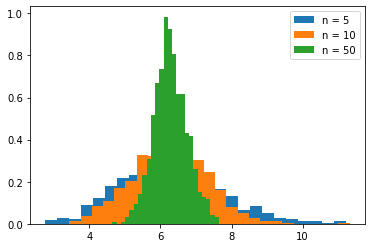

In [145]:
fig, ax = plt.subplots(1,1)

ax.hist(X_mean[0], density = True, bins = 25, label = 'n = ' + str(n[0]))
ax.hist(X_mean[1], density = True, bins = 25, label = 'n = ' + str(n[1]))
ax.hist(X_mean[2], density = True, bins = 25, label = 'n = ' + str(n[2]))
ax.legend()

plt.show